In [1]:
# Imports

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from keras import models
from keras import layers
from keras import callbacks

In [2]:
!ls

sample_data


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
df_alldata = pd.read_csv('/content/drive/MyDrive/ionosphere_data.csv')

In [5]:
df_alldata.shape

(351, 35)

In [6]:
df_alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [7]:
df_alldata.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_alldata.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [35]:
train_dataset = df_alldata.sample(frac = 0.6, random_state = 100)

In [36]:
test_dataset = df_alldata.drop(train_dataset.index)

In [37]:
train_dataset.shape

(211, 35)

In [38]:
test_dataset.shape

(140, 35)

In [14]:
train_dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
197,1,0,1.0,0.23058,1.00000,-0.78509,1.00000,-0.10401,1.00000,0.15414,1.00000,0.27820,0.98120,-0.06861,1.00000,0.06610,0.95802,-0.18954,0.83584,-0.15633,0.97400,0.03728,0.99624,0.09242,1.00000,-0.01253,0.96238,-0.04597,0.91165,0.03885,1.00000,-0.13722,0.96523,-0.11717,g
189,1,0,1.0,0.06843,1.00000,0.14211,1.00000,0.22108,1.00000,-0.12500,1.00000,0.39495,1.00000,0.48981,1.00000,0.58986,-0.37500,1.00000,1.00000,0.00000,1.00000,0.92001,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.25000,1.00000,1.00000,1.00000,1.00000,g
7,0,0,0.0,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
46,1,0,1.0,-0.03730,1.00000,-0.07383,0.99601,-0.11039,0.99838,-0.09931,0.98941,-0.13814,0.96674,-0.21695,0.95288,-0.25099,0.91236,-0.34400,0.90581,-0.32152,0.89991,-0.34691,0.87874,-0.37643,0.86213,-0.42990,0.83172,-0.43122,0.81433,-0.42593,0.77919,-0.47977,0.75115,-0.50152,g
136,1,0,-1.0,0.28105,0.22222,0.15033,-0.75693,-0.70984,-0.30719,0.71242,-1.00000,1.00000,-0.81699,0.33987,-0.79085,-0.02614,-0.98039,-0.83007,-0.60131,-0.54248,-0.04575,-0.83007,0.94118,-0.94118,-1.00000,-0.43137,0.74385,0.09176,-1.00000,0.05229,0.18301,0.02614,-0.40201,-0.48241,b


In [39]:
train_labels = train_dataset.pop('label')

In [16]:
train_labels.head()

197    g
189    g
7      b
46     g
136    b
Name: label, dtype: object

In [17]:
train_dataset.shape

(211, 34)

In [40]:
test_labels = test_dataset.pop('label')

In [19]:
test_dataset.shape

(140, 34)

In [20]:
test_labels.head()

0    g
2    g
4    g
8    g
9    b
Name: label, dtype: object

In [41]:
train_stats = train_dataset.describe()

In [42]:
train_stats = train_stats.transpose()

In [43]:
train_stats

,count,mean,std,min,25%,50%,75%,max
feature1,211.0,0.900474,0.300079,0.0,1.000000,1.00000,1.000000,1.0
feature2,211.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
feature3,211.0,0.653322,0.497109,-1.0,0.499350,0.88110,1.000000,1.0
feature4,211.0,0.049758,0.445174,-1.0,-0.058555,0.02520,0.205325,1.0
feature5,211.0,0.611633,0.514311,-1.0,0.429505,0.80920,1.000000,1.0
feature6,211.0,0.134417,0.459148,-1.0,-0.020360,0.04328,0.364610,1.0
feature7,211.0,0.552248,0.483899,-1.0,0.190420,0.72243,0.973550,1.0
feature8,211.0,0.111770,0.546632,-1.0,-0.052680,0.01678,0.487135,1.0
feature9,211.0,0.517769,0.497062,-1.0,0.104030,0.69258,0.954680,1.0
feature10,211.0,0.222402,0.490804,-1.0,-0.025090,0.06111,0.648935,1.0


In [44]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [45]:
normed_train_dataset = norm(train_dataset)

In [46]:
normed_train_dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
197,0.331666,NaN,0.697387,0.406183,0.755121,-2.002638,0.925302,-0.394745,0.970163,-0.139081,0.944168,0.214920,0.977641,-0.374120,1.016400,-0.060064,0.924863,-0.439848,0.774468,-0.236710,1.043385,0.023078,1.081045,0.250534,1.057733,0.113625,0.798305,0.035800,0.936278,0.151116,1.109739,-0.250248,1.144277,-0.269669
189,0.331666,NaN,0.697387,0.041943,0.755121,0.016756,0.925302,0.199970,0.970163,-0.707821,0.944168,0.444314,1.007213,0.728434,1.016400,1.015360,-1.195178,1.950455,1.029997,0.058845,1.084286,1.653698,1.087119,1.992347,1.057733,2.107341,0.867819,1.883586,1.089608,0.580456,1.109739,1.978294,1.207788,2.063779
7,-3.000790,NaN,-1.314244,-0.111772,-1.189229,-0.292753,0.925302,-2.033855,-1.041657,-0.453137,-2.567424,-2.296524,-0.565756,-0.238656,-0.456119,-0.195786,0.991628,1.950455,-2.083173,-1.831738,-0.488827,-0.045788,-0.528381,0.073162,1.057733,2.107341,0.867819,1.883586,-0.645882,0.072120,1.109739,1.978294,-0.618798,-0.024935
46,0.331666,NaN,0.697387,-0.195560,0.755121,-0.453550,0.917056,-0.406416,0.966904,-0.655478,0.925574,-0.603117,0.954896,-0.667006,0.947015,-0.711138,0.852245,-0.750225,0.883382,-0.549016,0.926833,-0.686616,0.891224,-0.649276,0.816839,-0.708196,0.556874,-0.644773,0.767380,-0.793941,0.732578,-0.921523,0.753242,-1.072466
136,0.331666,NaN,-3.325875,0.519555,-0.757156,0.034658,-2.705479,-1.503041,-1.659668,0.998399,-2.567424,1.633134,-1.850856,0.432390,-1.620660,-0.249459,-2.157993,-1.726951,-1.462578,-0.966759,-0.560797,-1.579132,0.992096,-1.733135,-2.436780,-0.711090,0.394510,0.279111,-2.381372,0.178444,-0.285747,0.069878,-1.353104,-1.032551


In [47]:
normed_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 197 to 195
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   211 non-null    float64
 1   feature2   0 non-null      float64
 2   feature3   211 non-null    float64
 3   feature4   211 non-null    float64
 4   feature5   211 non-null    float64
 5   feature6   211 non-null    float64
 6   feature7   211 non-null    float64
 7   feature8   211 non-null    float64
 8   feature9   211 non-null    float64
 9   feature10  211 non-null    float64
 10  feature11  211 non-null    float64
 11  feature12  211 non-null    float64
 12  feature13  211 non-null    float64
 13  feature14  211 non-null    float64
 14  feature15  211 non-null    float64
 15  feature16  211 non-null    float64
 16  feature17  211 non-null    float64
 17  feature18  211 non-null    float64
 18  feature19  211 non-null    float64
 19  feature20  211 non-null    float64
 20  feature2

In [48]:
normed_test_dataset = norm(test_dataset)

In [49]:
normed_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 350
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   140 non-null    float64
 1   feature2   0 non-null      float64
 2   feature3   140 non-null    float64
 3   feature4   140 non-null    float64
 4   feature5   140 non-null    float64
 5   feature6   140 non-null    float64
 6   feature7   140 non-null    float64
 7   feature8   140 non-null    float64
 8   feature9   140 non-null    float64
 9   feature10  140 non-null    float64
 10  feature11  140 non-null    float64
 11  feature12  140 non-null    float64
 12  feature13  140 non-null    float64
 13  feature14  140 non-null    float64
 14  feature15  140 non-null    float64
 15  feature16  140 non-null    float64
 16  feature17  140 non-null    float64
 17  feature18  140 non-null    float64
 18  feature19  140 non-null    float64
 19  feature20  140 non-null    float64
 20  feature21 

In [50]:
normed_test_dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,0.331666,NaN,0.688114,-0.244058,0.468193,-0.242529,0.582213,-0.894295,0.970163,-0.376528,0.685065,-0.680551,0.374172,-1.126058,0.435285,-0.980610,0.742825,-0.833456,0.379531,-0.549772,0.407391,-0.593940,0.068482,-0.835706,0.303111,-0.869283,-0.220931,-0.698583,-0.276813,-0.621046,0.123612,-1.049096,-0.278304,-0.971122
2,0.331666,NaN,0.697387,-0.187361,0.755121,-0.282189,0.925302,-0.425131,0.748158,-0.428728,0.471543,-0.226656,0.778236,-0.222327,0.347744,-0.189647,0.733585,-0.333147,0.649178,-0.102611,0.626306,-0.553818,0.172504,-0.158330,0.315638,-0.653653,0.109933,-0.274199,0.102114,-0.280969,0.433954,-0.455188,0.404912,-0.823617
4,0.331666,NaN,0.697387,-0.165706,0.641182,-0.150511,0.762168,-0.629894,0.510502,-0.787262,0.115397,-0.730064,0.321540,-0.252713,0.050354,-0.759554,0.243184,-0.496635,0.175540,-0.277925,-0.394724,-0.702946,-0.491079,-0.941683,-0.632109,-1.144693,-0.734392,-0.822915,-0.603692,-1.192557,-0.695823,-1.148763,-0.702967,-1.397157
8,0.331666,NaN,0.624064,-0.273462,0.755121,-0.604918,0.925302,-0.594367,0.970163,-1.190172,0.813713,-1.187752,0.920857,-1.041612,0.874920,-1.148117,0.964671,-0.767446,0.789302,-1.189318,0.696451,-1.165016,0.596605,-1.159434,0.797497,-1.150246,0.083935,-1.114506,-0.204460,-1.227571,0.172241,-1.407553,0.091652,-1.558468
9,0.331666,NaN,-1.351741,-0.301788,-1.189229,-0.292753,-1.141247,-0.204471,-0.810901,-0.999383,-1.613377,-1.081710,-0.565756,-0.238656,-0.951710,0.596820,-1.189341,0.242797,0.465392,0.476947,-0.488827,-0.045788,-0.528381,0.073162,-0.948170,0.112187,-0.598488,0.076484,-0.645882,0.072120,-0.314887,0.490652,-0.768724,0.770134


In [52]:
normed_train_dataset = normed_train_dataset.drop(['feature2'], axis =1)

In [53]:
normed_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 197 to 195
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   211 non-null    float64
 1   feature3   211 non-null    float64
 2   feature4   211 non-null    float64
 3   feature5   211 non-null    float64
 4   feature6   211 non-null    float64
 5   feature7   211 non-null    float64
 6   feature8   211 non-null    float64
 7   feature9   211 non-null    float64
 8   feature10  211 non-null    float64
 9   feature11  211 non-null    float64
 10  feature12  211 non-null    float64
 11  feature13  211 non-null    float64
 12  feature14  211 non-null    float64
 13  feature15  211 non-null    float64
 14  feature16  211 non-null    float64
 15  feature17  211 non-null    float64
 16  feature18  211 non-null    float64
 17  feature19  211 non-null    float64
 18  feature20  211 non-null    float64
 19  feature21  211 non-null    float64
 20  feature2

In [54]:
normed_test_dataset = normed_test_dataset.drop(['feature2'], axis =1)

In [55]:
normed_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 350
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   140 non-null    float64
 1   feature3   140 non-null    float64
 2   feature4   140 non-null    float64
 3   feature5   140 non-null    float64
 4   feature6   140 non-null    float64
 5   feature7   140 non-null    float64
 6   feature8   140 non-null    float64
 7   feature9   140 non-null    float64
 8   feature10  140 non-null    float64
 9   feature11  140 non-null    float64
 10  feature12  140 non-null    float64
 11  feature13  140 non-null    float64
 12  feature14  140 non-null    float64
 13  feature15  140 non-null    float64
 14  feature16  140 non-null    float64
 15  feature17  140 non-null    float64
 16  feature18  140 non-null    float64
 17  feature19  140 non-null    float64
 18  feature20  140 non-null    float64
 19  feature21  140 non-null    float64
 20  feature22 

In [60]:
def tonumber(x):
    return x.map({'g':1, 'b': 0})
    
train_labels = train_labels.apply(tonumber)

AttributeError: ignored

In [57]:
train_labels

197    g
189    g
7      b
46     g
136    b
      ..
77     b
230    b
206    b
278    g
195    g
Name: label, Length: 211, dtype: object

In [ ]:
# As per Assignment instructions
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu',input_shape=(normed_train_dataset.shape[1],)))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# As per Assignment Epochs
history = model.fit(normed_train_dataset, train_labels, epochs=200, batch_size=8, validation_split=0.2, verbose=0)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
195,34.099751,4.506894,42.157440,5.197068,195
196,33.913940,4.503933,44.239761,5.218402,196
197,34.089790,4.478327,42.651104,5.187805,197
198,33.788200,4.495978,41.666996,5.196627,198
199,34.135216,4.528048,42.015781,5.163747,199


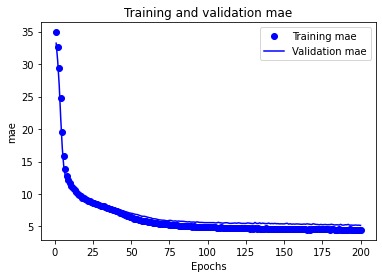

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

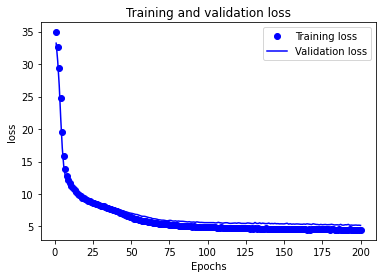

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, mae, 'bo', label='Training loss')
plt.plot(epochs, val_mae, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Readjusting
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(32, activation='relu',input_shape=(normed_train_dataset.shape[1],)))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Adjusting Epochs
history = model.fit(normed_train_dataset, train_labels, epochs=500, batch_size=8, validation_split=0.2, verbose=0)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
495,12.425515,2.568680,23.110163,3.687423,495
496,11.552792,2.426978,26.693930,4.043894,496
497,12.521665,2.573584,26.114862,3.979903,497
498,12.350956,2.553720,21.538210,3.590041,498
499,11.738581,2.499622,24.369249,3.781035,499


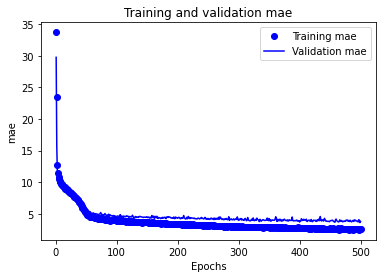

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

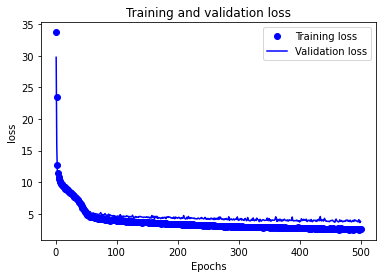

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, mae, 'bo', label='Training loss')
plt.plot(epochs, val_mae, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
evaluate = model.evaluate(normed_test_dataset, test_labels, verbose=0)

In [ ]:
evaluate

[43.552734375, 4.5777740478515625]

In [ ]:
test_predictions = model.predict(normed_test_dataset)

In [ ]:
test_predictions[:10]

array([[58.88801 ],
       [46.267773],
       [28.922884],
       [28.72124 ],
       [48.373543],
       [30.730053],
       [51.69705 ],
       [51.198254],
       [50.038605],
       [43.111313]], dtype=float32)

In [ ]:
test_labels[:10]

0     79.99
2     40.27
4     44.30
11    28.02
13    42.33
14    47.81
16    39.36
17    56.14
30    55.26
34    53.69
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64